In [1]:
# Installing Condacolab to integrate Conda with Colab
!pip install -q condacolab

# Importing and run Condacolab to enable Conda
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


In [2]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.9/583.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.6 MB/s eta 0:00:00


In [4]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.0/662.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 28.1 MB/s eta 0:00:00


In [6]:
!pip install langchain_groq

In [8]:
!pip install langchain_tavily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.8 MB/s eta 0:00:00


In [9]:
import sys

import os
from google.colab import userdata
# from dotenv import load_dotenv
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.tools import Tool
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_groq import ChatGroq
from langchain.chains import RetrievalQA
from langchain.agents import create_react_agent
from langchain_core.prompts import ChatPromptTemplate
from langchain import hub
from langchain.agents import AgentExecutor
from langchain_tavily import TavilySearch

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from google.colab import userdata
import os

# Load API keys from Colab Secrets
try:
    openai_api_key = userdata.get('OPENAI_API_KEY')
    if not openai_api_key:
        raise ValueError("OPENAI_API_KEY not found in Colab Secrets.")
    # Set the environment variable for OpenAI
    os.environ["OPENAI_API_KEY"] = openai_api_key
except KeyError:
    raise ValueError("OPENAI_API_KEY not found in Colab Secrets.")

try:
    groq_api_key = userdata.get('GROQ_API_KEY')
    if not groq_api_key:
        raise ValueError("GROQ_API_KEY not found in Colab Secrets.")
    # Optionally set environment variable if needed by other libraries
    os.environ["GROQ_API_KEY"] = groq_api_key
except KeyError:
    raise ValueError("GROQ_API_KEY not found in Colab Secrets.")

try:
    tavily_api_key = userdata.get('TAVILY_API_KEY')
    if not tavily_api_key:
        raise ValueError("TAVILY_API_KEY not found in Colab Secrets.")
    # Optionally set environment variable if needed by other libraries
    os.environ["TAVILY_API_KEY"] = tavily_api_key
except KeyError:
    raise ValueError("TAVILY_API_KEY not found in Colab Secrets.")

# Optionally, print a confirmation (avoid printing the actual keys for security)
print("All API keys loaded successfully.")

All API keys loaded successfully.


In [10]:
# from google.colab import userdata

# Load API keys from Colab Secrets
try:
    openai_api_key = userdata.get('OPENAI_API_KEY')
    if not openai_api_key:
        raise ValueError("OPENAI_API_KEY not found in Colab Secrets.")
except KeyError:
    raise ValueError("OPENAI_API_KEY not found in Colab Secrets.")

try:
    groq_api_key = userdata.get('GROQ_API_KEY')
    if not groq_api_key:
        raise ValueError("GROQ_API_KEY not found in Colab Secrets.")
except KeyError:
    raise ValueError("GROQ_API_KEY not found in Colab Secrets.")

try:
    tavily_api_key = userdata.get('TAVILY_API_KEY')
    if not tavily_api_key:
        raise ValueError("TAVILY_API_KEY not found in Colab Secrets.")
except KeyError:
    raise ValueError("TAVILY_API_KEY not found in Colab Secrets.")

# Optionally, print a confirmation (avoid printing the actual keys for security)
print("All API keys loaded successfully.")

All API keys loaded successfully.


In [12]:
%cd /content/drive/MyDrive/crew_data

/content/drive/MyDrive/crew_data


In [15]:
!pip install pypdf

In [16]:
#setting up the directories
data_dir = '/content/drive/MyDrive/crew_data'
new_docs_dir = os.path.join(data_dir, "new_docs")
faiss_index_path = "faiss_index"

#Loading and splitting original documents
documents = []
for filename in os.listdir(data_dir):
    if filename.endswith('.pdf'):
        loader = PyPDFLoader(os.path.join(data_dir, filename))
        documents.extend(loader.load())
if not documents:
    raise ValueError(f"No PDF files found in '{data_dir}'.")

# Split documents into smaller chunks
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, chunk_overlap=50)
texts = text_splitter.split_documents(documents)

In [17]:
#Loading and splitting original documents
documents = []
for filename in os.listdir(data_dir):
    if filename.endswith('.pdf'):
        loader = PyPDFLoader(os.path.join(data_dir, filename))
        documents.extend(loader.load())
if not documents:
    raise ValueError(f"No PDF files found in '{data_dir}'.")

# Split documents into smaller chunks
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, chunk_overlap=50)
texts = text_splitter.split_documents(documents)

In [24]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 42.2 MB/s eta 0:00:00


In [25]:
#Create embeddings and store in a vector database
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
vector_store = FAISS.from_documents(texts, embeddings)

vector_store.save_local("faiss_index")
print("FAISS vector store saved locally.")

FAISS vector store saved locally.


In [26]:
#Loading the created FAISS vector store since it has been created and saved already
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
vector_store = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)
print(f"Successfully loaded and processed {len(documents)} documents.")


Successfully loaded and processed 17 documents.


In [27]:
#Expanding the knowledge base
all_new_chunks = []
if os.path.exists(new_docs_dir):
    for filename in os.listdir(new_docs_dir):
        if filename.endswith('.pdf'):
            loader = PyPDFLoader(os.path.join(new_docs_dir, filename))
            new_docs = loader.load()
            new_chunks = text_splitter.split_documents(new_docs)
            all_new_chunks.extend(new_chunks)

    if all_new_chunks:
        vector_store.add_documents(all_new_chunks)
        vector_store.save_local("faiss_index")
        print(f"Added {len(all_new_chunks)} new chunks from {len(os.listdir(new_docs_dir))} documents.")
    else:
        print("No new documents found to add.")

Added 179 new chunks from 5 documents.


In [28]:
query = "What is the role of AI in healthcare today?"
docs = vector_store.similarity_search(query)
print("\nSample query results:")
for doc in docs:
    print(f"Retrieved Document: {doc.page_content[:200]}... (Source: {doc.metadata.get('source', 'Unknown')})")


Sample query results:
Retrieved Document: A PREPRINT - JULY 25, 2024
9 Challenges in AI-driven Clinical Summarization
The use of AI in handling sensitive patient information raises significant privacy concerns. Ensuring the security of
patien... (Source: /content/drive/MyDrive/crew_data/doc (1).pdf)
Retrieved Document: This study measured the number of alerts a physician received, which is a common proxy for measuring information
overload. Furthermore, these alerts lead to almost 30% of these physicians reporting mi... (Source: /content/drive/MyDrive/crew_data/doc (1).pdf)
Retrieved Document: and current health status into a concise, accessible format. This practice has significant implications for healthcare
professionals, patient health outcomes, and hospital expenditures. However, even ... (Source: /content/drive/MyDrive/crew_data/doc (1).pdf)
Retrieved Document: A PREPRINT - JULY 25, 2024
6 Radiology Case Reports and Biomedical Research
Radiological reports, essential for diagnosi

In [29]:
#Setting up RetrievalQA chain
llm = ChatGroq(model_name="mistral-saba-24b", temperature=0, max_tokens=10000)
# Setting up retriever from vector store
retriever = vector_store.as_retriever(search_kwargs={"k": 3})

In [30]:
# Create RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

# Test QA chain with the same query
response = qa_chain.invoke(query)
print(f"Query: {query}")
print(f"Response: {response}")

Query: What is the role of AI in healthcare today?
Response: {'query': 'What is the role of AI in healthcare today?', 'result': 'AI in healthcare today plays a significant role in various aspects, including clinical summarization. Here are some key points based on the provided context:\n\n1. **Clinical Summarization**: AI, particularly through natural language processing (NLP), is used to process and summarize clinical free-text data. This helps in creating concise, accessible summaries of patient information, which can aid healthcare professionals in making informed decisions.\n\n2. **Information Management**: AI helps manage the growing volume of healthcare information, which can alleviate physician burnout and improve patient-physician relations.\n\n3. **Data Analysis**: Advanced AI models, such as Google’s Med-Gemini, Meta’s Llama 3, OpenAI’s ChatGPT4, and Anthropic’s Claude 3.5, can process large amounts of data for summarization and analysis.\n\n4. **Privacy and Security**: AI sy

# **TASK 1(a): Test similarity search**

In [31]:
# Test similarity search
query = "Why is making primary care safe difficult?"
docs = vector_store.similarity_search(query)
for doc in docs:
    print(f"Retrieved Document: {doc.page_content[:200]}... (Source: {doc.metadata.get('source', 'Unknown')})")

Retrieved Document: cation errors.
P
rimary care is characterized by customized care that
responds to individual patients’ needs, values, and prefer-
ences across a broad spectrum of health care.
1–3
Its diver-
sity, sco... (Source: /content/drive/MyDrive/crew_data/v011p00233.pdf)
Retrieved Document: serious consequence reported in this study and was traced to
a failure of message handling. The risk of death was a
possibility in other cases—for instance, a physician was
unable to contact a patient... (Source: /content/drive/MyDrive/crew_data/v011p00233.pdf)
Retrieved Document: ORIGINAL ARTICLE
A preliminary taxonomy of medical errors in family
practice
S M Dovey, D S Meyers, R L Phillips Jr, L A Green, G E Fryer, J M Galliher, J Kappus,
P Grob
................................. (Source: /content/drive/MyDrive/crew_data/v011p00233.pdf)
Retrieved Document: Primary Care Research, The American Academy of Family Physicians,
Leawood, KS 66211-2672, USA
P Grob,Department of Postgraduate Genera

# **TASK 1(b): Extract embeddings from the vector store**

In [34]:
embedding_vectors = np.array([vector_store.index.reconstruct_n(i, 1)[0] for i in range(vector_store.index.ntotal)])
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_vectors)

# **Determining optimal k using elbow method**

In [36]:
from sklearn.cluster import KMeans

In [37]:
# With cluster Sum of squared errors
wcss = []  # With cluster Sum of squared errors
# Test k from 1 to 10
k_range = range(1, 11)  # Test k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(embedding_vectors)
    wcss.append(kmeans.inertia_)

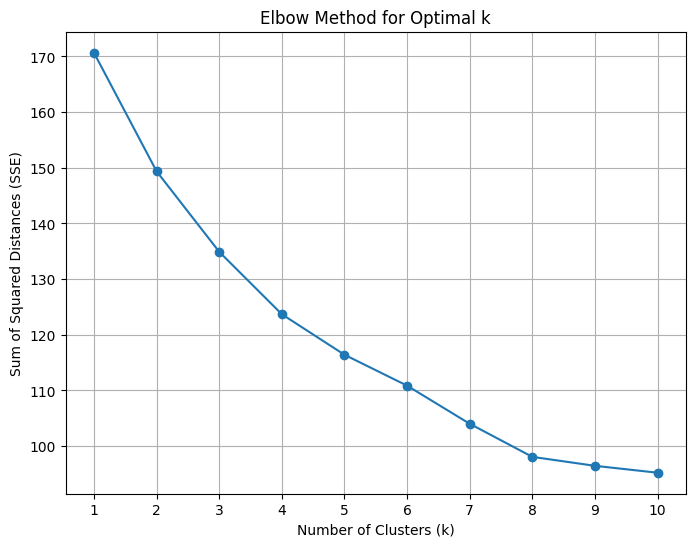

In [38]:
#  Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

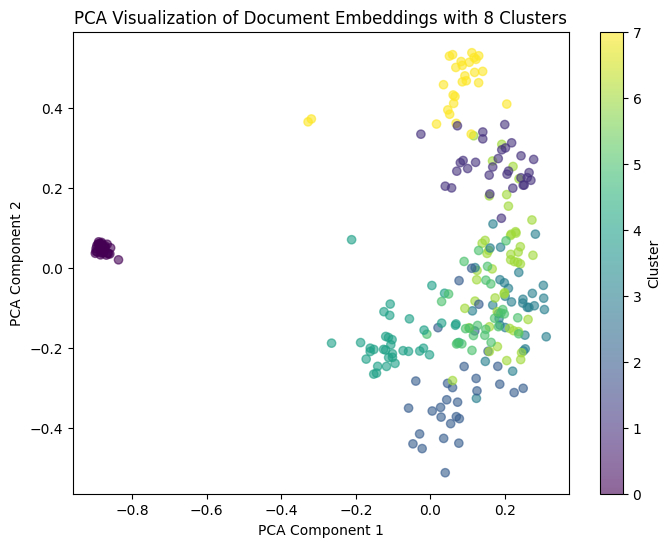

In [39]:
optimal_k = 8
#Cluster with the chosen k and visualize
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init='auto')
labels = kmeans.fit_predict(embedding_vectors)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'PCA Visualization of Document Embeddings with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

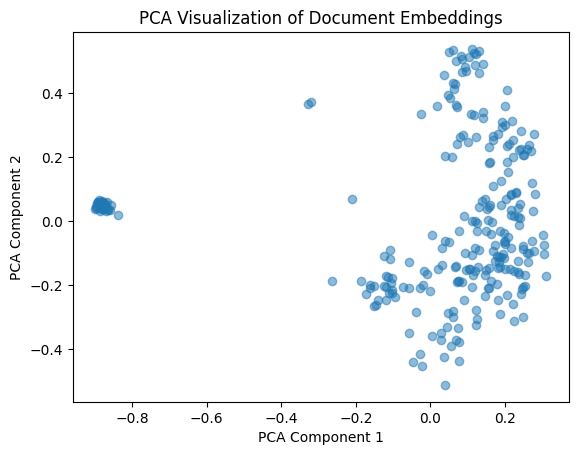

In [41]:
#plot to determine optimum k using elbow method
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title("PCA Visualization of Document Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [42]:
#Trying to determine what cluster each chunk belongs to
print("\nDocuments/Chunks per Cluster:")
for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id}:")
    cluster_indices = np.where(labels == cluster_id)[0]  # Getting indices of embeddings in this cluster
    for idx in cluster_indices[:6]:
        if idx < len(texts):
            chunk = texts[idx]
            source = chunk.metadata.get('source', 'Unknown')
            content_snippet = chunk.page_content[:100] + "..." if len(chunk.page_content) > 100 else chunk.page_content
            print(f"  - Chunk {idx}: Source: {source}, Content: {content_snippet}")
        else:
            print(f"  - Chunk {idx}: (Index out of range for original chunk list)")
    if len(cluster_indices) > 5:
        print(f"  ... and {len(cluster_indices) - 5} more chunks in Cluster {cluster_id}")



Documents/Chunks per Cluster:

Cluster 0:
  - Chunk 40: Source: /content/drive/MyDrive/crew_data/v011p00233.pdf, Content: /K31/K2E/K31/K2E/K32/K2E/K33/K2E /K52/K65/K63/K6F/K72/K64 /K6E/K6F/K74 /K75/K70 /K74/K6F /K64/K61/K7...
  - Chunk 41: Source: /content/drive/MyDrive/crew_data/v011p00233.pdf, Content: /K31/K2E/K31/K2E/K35/K2E /K41/K70/K70/K6F/K69/K6E/K74/K6D/K65/K6E/K74/K73
/K31/K2E/K32/K2E/K31/K2E/K...
  - Chunk 42: Source: /content/drive/MyDrive/crew_data/v011p00233.pdf, Content: /K31/K2E/K32/K2E/K31/K2E/K34/K2E /K52/K65/K73/K70/K6F/K6E/K64/K69/K6E/K67 /K74/K6F /K61/K62/K6E/K6F/...
  - Chunk 43: Source: /content/drive/MyDrive/crew_data/v011p00233.pdf, Content: /K31/K2E/K32/K2E/K32/K2E/K32/K2E /K49/K6D/K70/K6C/K65/K6D/K65/K6E/K74/K69/K6E/K67 /K64/K69/K61/K67/K...
  - Chunk 44: Source: /content/drive/MyDrive/crew_data/v011p00233.pdf, Content: /K45/K72/K72/K6F/K72/K73 /K69/K6E /K61 /K70/K72/K6F/K63/K65/K73/K73 /K6F/K66 /K74/K68/K65 /K68/K65/K...
  - Chunk 45: Source: /content/drive/


# **TASK 3: Create a New AI Agent ("Trend") with Tavily Tool**

In [44]:
print("\n=== Starting Task 3: Creating 'Trend' AI Agent for AI in Healthcare News ===\n")

tavily_tool = TavilySearch(
    max_results=2,
    topic="news",  # Focus on news for latest updates
    include_answer=True,
    include_raw_content=False
)


=== Starting Task 3: Creating 'Trend' AI Agent for AI in Healthcare News ===



In [46]:
from langchain.prompts import PromptTemplate

In [47]:
custom_prompt = PromptTemplate(
    input_variables=["input"],
    template="""
    You are 'Trend', an expert AI agent specializing in summarizing the latest news and trends on AI in Healthcare.
    Use the provided tools to fetch up-to-date information from the web.
    Synthesize the information into a concise summary of 3-5 sentences, highlighting key trends and technologies.
    Avoid listing raw data; focus on a cohesive narrative.
    Query: {input}
    """
)

In [48]:
# Pulling a prebuilt ReAct prompt from the hub since a customized promt isnt working
react_prompt = hub.pull("hwchase17/react")

# Initializing the Trend Agent with the prebuilt prompt
trend_agent = create_react_agent(
    llm=llm,  # Your existing LLM
    tools=[tavily_tool],  # Your search tool
    prompt=react_prompt  # Prebuilt prompt with required variables
)

# Creating an executor to run the agent
trend_agent_executor = AgentExecutor(
    agent=trend_agent,
    tools=[tavily_tool],
    verbose=True
)

# Run the query
trend_query = "Summarize the latest news on AI in Healthcare."
trend_result = trend_agent_executor.invoke({"input": trend_query})
print(f"This is Trend Agent Response to Task 3: {trend_result['output']}")

/usr/local/lib/python3.11/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(




> Entering new AgentExecutor chain...
To provide the latest news on AI in healthcare, I need to perform a search to gather recent and relevant information.

Action: tavily_search

Action Input: latest news on AI in healthcare{'query': 'latest news on AI in healthcare', 'follow_up_questions': None, 'answer': "AI is increasingly used in healthcare for diagnostics, treatment planning, and patient care management. Its adoption is growing despite challenges like access and workforce shortages. Recent trends highlight AI's potential to improve global health outcomes.", 'images': [], 'results': [{'title': 'AI in Health Care - American Medical Association', 'url': 'https://www.ama-assn.org/topics/health-care-ai', 'content': 'Artificial/augmented intelligence (AI) technology continues to grow in importance in health care, with AI applications to healthcare proliferating across health systems, private practices, research labs and other settings. ... Stay up-to-date on information about AI tren

# **Creating a Multi Agent Question Answering System that is capable of conducting deep research, write expertly and critique the written research**

In [50]:
retriever_tool = Tool.from_function(
    func=retriever.invoke,
    name="FAISS Retriever",
    description="Retrieve relevant documents from a local knowledge base on AI in healthcare."
)

# **The Research Agent**

In [51]:
# Researcher Agent Setup
researcher_prompt = hub.pull("hwchase17/react")
researcher_agent = create_react_agent(
    llm=llm,
    tools=[retriever_tool, tavily_tool],
    prompt=researcher_prompt
)
researcher_agent_executor = AgentExecutor(agent=researcher_agent, tools=[retriever_tool, tavily_tool], verbose=True)
research_query = "Summarize the latest news on AI in Healthcare, including detailed information on specific initiatives, events, and technologies mentioned in recent reports."
research_result = researcher_agent_executor.invoke({"input": research_query})
print(f"This is what the research agent has researched: {research_result['output']}")

/usr/local/lib/python3.11/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(




> Entering new AgentExecutor chain...
To provide a comprehensive summary of the latest news on AI in healthcare, I need to gather recent information from reliable sources. I'll start by using the FAISS Retriever to get relevant documents from the local knowledge base on AI in healthcare. Then, I'll use the tavily_search tool to find the latest news and updates.

Action: FAISS Retriever
Action Input: 'AI in healthcare'[Document(id='f449bcf4-304b-45d9-91bb-2715ab33fb2b', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-07-25T00:12:48+00:00', 'author': '', 'keywords': '', 'moddate': '2024-07-25T00:12:48+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': '/content/drive/MyDrive/crew_data/doc (1).pdf', 'total_pages': 6, 'page': 4, 'page_label': '5'}, page_content='A PREPRINT - JULY 25, 2024\n9 Challenges in AI-driven Cl

# **The Writer Agent**

In [52]:
# Writer Agent Setup
writer_prompt = hub.pull("hwchase17/react")
writer_agent = create_react_agent(
    llm=llm,
    tools=[],
    prompt=writer_prompt
)
writer_agent_executor = AgentExecutor(agent=writer_agent, tools=[], verbose=True, handle_parsing_errors=True)
write_result = writer_agent_executor.invoke(
    {"input": f"Generate a detailed summary based on this data: {research_result['output']}"})
print(f"This is what the writer agent has written regarding the summary: {write_result['output']}")

/usr/local/lib/python3.11/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(




> Entering new AgentExecutor chain...
To generate a detailed summary, I need to synthesize the information provided into a coherent and structured format. I will break down the key points into sections for clarity.

Action: Summarize the text into key sections.

Action Input: The provided text.
Summarize the text into key sections. is not a valid tool, try one of [].To generate a detailed summary, I will manually organize the information into key sections based on the provided text.

**Summary:**

**Challenges in AI-driven Clinical Summarization:**
1. **Privacy Concerns**: Ensuring the security of patient data and compliance with healthcare regulations such as HIPAA is crucial.
2. **Accuracy**: The reliability of AI-generated summaries depends on the quality of input data and the calibration of AI models.
3. **System Integration**: Integrating AI tools into existing healthcare IT systems poses technical and operational challenges, requiring compatibility with diverse systems and user

# **The Critic Agent**

In [53]:
# Critic Agent Setup
critic_prompt = hub.pull("hwchase17/react")
critic_agent = create_react_agent(
    llm=llm,
    tools=[tavily_tool],
    prompt=critic_prompt
)
critic_agent_executor = AgentExecutor(
    agent=critic_agent,
    tools=[tavily_tool],
    verbose=True,
    handle_parsing_errors=True
)
critique_result = critic_agent_executor.invoke({
                                                   "input": f"Review this summary for accuracy and completeness, suggesting specific improvements: {write_result['output']}"})
critique_text = critique_result.get('output', '')
print("Critique Suggestions:", critique_text)

/usr/local/lib/python3.11/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(




> Entering new AgentExecutor chain...
To ensure the summary is accurate and complete, I need to verify the information provided and check for any recent updates or additional points that might be relevant. I will start by searching for recent developments in AI-driven clinical summarization and related challenges.

Action: tavily_search

Action Input: Recent developments in AI-driven clinical summarization and related challenges{'query': 'Recent developments in AI-driven clinical summarization and related challenges', 'follow_up_questions': None, 'answer': 'Recent AI-driven clinical summarization shows promise but faces challenges in data structure and representativeness. Ethical issues like biases and data privacy remain significant hurdles. Models like Med-BERT show potential but need broader datasets.', 'images': [], 'results': [{'title': 'Prospects for AI clinical summarization to reduce the burden of patient ...', 'url': 'https://pmc.ncbi.nlm.nih.gov/articles/PMC11578995/', 'con

# **Implementing Feedback and Corrections to the Writer Agent provided by the Critic Agent**

In [54]:
# Feedback Loop for Revisions
max_revision_attempts = 2  # Limit the number of revision cycles
revision_count = 0
current_summary = write_result['output']
current_critique = critique_text

while revision_count < max_revision_attempts:
    if any(keyword in current_critique.lower() for keyword in
           ["improve", "add", "more detail", "specific", "lacking", "missing"]):
        print(
            f"Revision {revision_count + 1}/{max_revision_attempts}: Critic feedback suggests improvements. Sending back to writer agent.")
        revision_query = f"Revise this summary based on the following critique: Summary: {current_summary} | Critique: {current_critique}"
        revised_write_result = writer_agent_executor.invoke({"input": revision_query})
        current_summary = revised_write_result['output']
        print(f"Revised Summary (Iteration {revision_count + 1}): {current_summary}")

        critique_result = critic_agent_executor.invoke({
                                                           "input": f"Review this revised summary for accuracy and completeness, suggesting specific improvements: {current_summary}"})
        current_critique = critique_result.get('output', '')
        print(f"Updated Critique (Iteration {revision_count + 1}): {current_critique}")

        revision_count += 1
    else:
        print("Critic feedback accepted. No further revisions needed.")
        break

if revision_count >= max_revision_attempts:
    print(f"Reached maximum revision attempts ({max_revision_attempts}). Proceeding with the latest summary.")

final_revised_summary = current_summary
print("Final Revised Summary after Feedback Loop:", final_revised_summary)

Revision 1/2: Critic feedback suggests improvements. Sending back to writer agent.


> Entering new AgentExecutor chain...
To revise the summary based on the critique, I need to incorporate the additional points mentioned in the critique while maintaining the original structure and flow of the summary.

Action: [Edit Text]
Action Input: The original summary and the critique.[Edit Text] is not a valid tool, try one of [].To revise the summary, I need to manually incorporate the additional points from the critique into the original summary. Let's do that step by step.

Action: [Edit Text]
Action Input: The original summary and the critique.
[Edit Text] is not a valid tool, try one of [].I will manually revise the summary based on the critique.

**Revised Summary:**

**Challenges in AI-driven Clinical Summarization:**
1. **Privacy Concerns**: Ensuring the security of patient data and compliance with healthcare regulations such as HIPAA is crucial.
2. **Accuracy**: The reliability of AI-ge

# **Task 4: Building the Report Generation Tool that saves the Report as Both Mark Down and PDF Format**

In [56]:
# Report Generation Tool
def generate_report_tool(content: str, output_md_path: str = "report2.md", output_pdf_path: str = "report2.pdf") -> str:
    original_summary = ""
    critique = ""
    revised_summary = ""

    if "Original Summary:" in content and "Critique:" in content and "Revised Summary:" in content:
        parts = content.split("Original Summary:")[1].split("Critique:")
        original_summary = parts[0].strip()
        remaining = parts[1].split("Revised Summary:")
        critique = remaining[0].strip()
        revised_summary = remaining[1].strip()
    else:
        revised_summary = content  # Fallback if parsing fails

    markdown_content = f"""
# AI in Healthcare Report

## Summary of Latest Trends and Insights (Original)
{original_summary}

## Critique and Suggested Improvements
{critique}

## Summary of Latest Trends and Insights (Revised)
{revised_summary}

## Conclusion
This report summarizes the latest developments in AI for healthcare based on recent data and news.
    """
    with open(output_md_path, 'w', encoding='utf-8') as md_file:
        md_file.write(markdown_content)

    pdf = MarkdownPdf(toc_level=2)
    pdf.add_section(Section(markdown_content))
    pdf.meta['title'] = 'AI in Healthcare Report'
    pdf.meta['author'] = 'AI Agent Report Generator Created by Obanla Oluwaseun'
    pdf.save(output_pdf_path)

    return (f"The Report has been generated and saved as {output_md_path} (Markdown) and "
            f"{output_pdf_path} (PDF)")

In [57]:
# Report Tool and Agent Setup
report_tool = Tool.from_function(
    func=generate_report_tool,
    name="ReportGeneratorTool",
    description="Generate a structured report in Markdown and PDF format from provided content."
)
report_prompt = hub.pull("hwchase17/react")
report_agent = create_react_agent(
    llm=llm,
    tools=[report_tool],
    prompt=report_prompt
)
report_agent_executor = AgentExecutor(
    agent=report_agent,
    tools=[report_tool],
    verbose=True
)

/usr/local/lib/python3.11/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [60]:
!pip install markdown-pdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 61.7 MB/s eta 0:00:00


In [61]:
from markdown_pdf import MarkdownPdf, Section

In [62]:
# Invoke Report Generator with All Components
report_query = f"Generate a structured report with these components: Original Summary: {write_result['output']} | Critique: {critique_text} | Revised Summary: {final_revised_summary}"
report_result = report_agent_executor.invoke({"input": report_query})
print(f"Report Generation Result: {report_result['output']}")



> Entering new AgentExecutor chain...
To generate a structured report, I need to use the ReportGeneratorTool with the provided content. The content includes the original summary, critique, and revised summary.

Action: ReportGeneratorTool
Action Input: The provided content.The Report has been generated and saved as report2.md (Markdown) and report2.pdf (PDF)I now know the final answer.

Final Answer: The report has been generated and saved as report2.md (Markdown) and report2.pdf (PDF).

> Finished chain.
Report Generation Result: The report has been generated and saved as report2.md (Markdown) and report2.pdf (PDF).
